In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import sys

sys.path.append("/home/Brandon/Documents/feedback_helper_functions/")
from transfer import *
import filters as fl

In [2]:
n = 3
print(fl.find_n_chebyshev(3, .93, .1))
hp = .93
wc = 1
a, b = fl.find_chebyshev_ab(n, .9)
itier = int(ceil(n)/2)
offset_start = 180/(2*n)
frac_arr = frac([1], [1])
frac_list = []
for i in range(itier):
    cur_fraca = frac([wc], [1, wc*(a*np.cos(np.deg2rad(offset_start + i*(180/n))) + 1j*b*np.sin(np.deg2rad(offset_start + i*(180/n))))])
    cur_fracb = frac([wc], [1, wc*(a*np.cos(np.deg2rad(offset_start + i*(180/n))) - 1j*b*np.sin(np.deg2rad(offset_start + i*(180/n))))])
    cur_frac = convolve_equations(cur_fraca, cur_fracb)
    cur_frac.apply_function(lambda x : np.real(x))
    frac_arr = convolve_equations(frac_arr, cur_frac)
    print(cur_frac.print())

if ceil(n)%2 == 1:
    cur_frac = frac([0, wc], [1, a*wc])
    frac_arr = convolve_equations(frac_arr, cur_frac)
    print(cur_frac.print())

K = (frac_arr.den[-1] * hp)/wc**n
frac_arr.set_k(float(K))
den = np.convolve([1, .694, .286],
                  [1, .2886, .995])
num = [1]
print(frac_arr.print())

test_case = frac(num, den)
w, hmag, pmag = make_bode(frac_arr, bode_start=.1, bode_stop=10, dt=.01)

plt.semilogx(w, db_to_amp(hmag), 'k')
plt.grid(which='both')
plt.title("8.3.3 Chebyshev filter 3 pole")
plt.ylabel("|H|")
plt.xlabel("$\\omega$")
plt.savefig("833.png")
#plt.axis([0.1, 10, 0, 4])


UnboundLocalError: cannot access local variable 'ws' where it is not associated with a value

$\frac{1s^2}{0.5107894563765651s^2 + 265.354768605489s + 90000.0}$ k = 1
$\frac{1s}{1s + 153.20264708512994}$ k = 1
$\frac{10.343486491625445s^3}{0.5107894563765651s^3 + 343.6090654255533s^2 + 130653.05296702305s + 13788238.237661695}$ k = 10.343486491625445


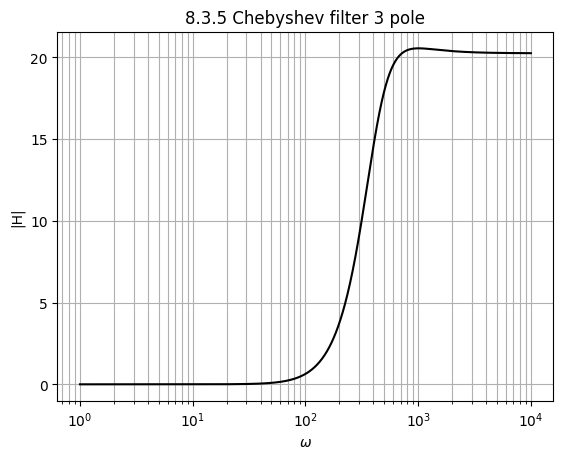

In [3]:
n = 3
wc = 300
hp = .9
a, b = fl.find_chebyshev_ab(n, hp)
itier = int(ceil(n)/2)
offset_start = 180/(2*n)
frac_arr = frac([1], [1])
frac_list = []
for i in range(itier):
    cur_fraca = frac([1, 0], [((a*np.cos(np.deg2rad(offset_start + i*(180/n))) + 1j*b*np.sin(np.deg2rad(offset_start + i*(180/n))))),wc])
    cur_fracb = frac([1, 0], [((a*np.cos(np.deg2rad(offset_start + i*(180/n))) - 1j*b*np.sin(np.deg2rad(offset_start + i*(180/n))))),wc])
    cur_frac = convolve_equations(cur_fraca, cur_fracb)
    cur_frac.apply_function(lambda x : np.real(x))
    frac_arr = convolve_equations(frac_arr, cur_frac)
    print(cur_frac.print())

if ceil(n)%2 == 1:
    cur_frac = frac([1, 0], [1, a*wc])
    frac_arr = convolve_equations(frac_arr, cur_frac)
    frac_list.append(cur_frac)
    print(cur_frac.print())

K = (frac_arr.den[0] * hp)
K*=22.5
frac_arr.set_k(float(K))
den = np.convolve([1, .694/wc, 1/(.286*wc**2)], [1, .2881/wc, 1/(.995*wc**2)])
num = [.258,0,0]
test_case = frac(num, den)
print(frac_arr.print())

test_case = frac(num, den)
w, hmag, pmag = make_bode(frac_arr, bode_start=1, bode_stop=10000, dt=.01, define_w=True)

plt.semilogx(w, db_to_amp(hmag), 'k')
plt.grid(which='both')
plt.title("8.3.5 Chebyshev filter 3 pole")
plt.ylabel("|H|")
plt.xlabel("$\\omega$")
plt.savefig("835.png")


In [4]:

print(fl.find_n_chebyshev(1000/300, .9, .02272))
filt = fl.chebyshev_filter(2, .5)
print(filt.print())

2.776346087863442
$\frac{1}{1.0s^2 + 1.137610363307938s + 1.1470786693528092}$ k = 1
$\frac{1}{1.0s^2 + 1.137610363307938s + 1.1470786693528092}$ k = 1


$\frac{250000}{1.0s^2 + 347.7677122429524s + 72034.85581252023}$ k = 1
$\frac{250000}{1.0s^2 + 144.05010296649476s + 248811.5511091571}$ k = 1
$\frac{10.343486491625445s^3}{0.5107894563765651s^3 + 343.6090654255533s^2 + 130653.05296702305s + 13788238.237661695}$ k = 10.343486491625445


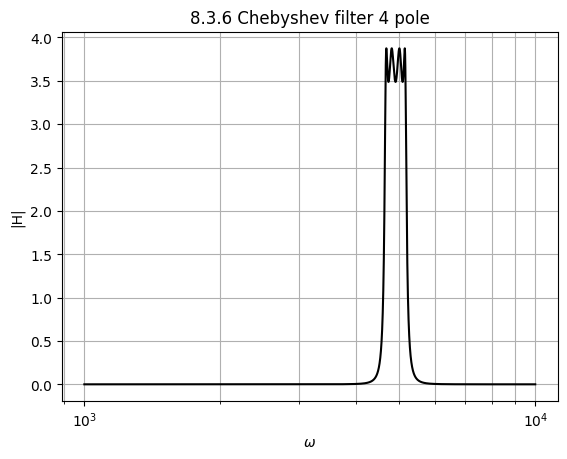

In [5]:

    
passband = 5250 - 4750

n = 8
wc=4900
hp = .95
n = int(ceil(n)/2)
corner = passband
filters = fl.chebyshev_filter(n, hp, corner, return_list=True, calulate_K=True)
for filt in filters:
    if len(filt.num) == 3:
        filt.den = [1, filt.den[1], filt.den[2]+2*wc**2, filt.den[1]*wc**2, wc**4]
        filt.num = [0, 0, filt.num[-1], 0, 0]
    else:
        filt.den = [1, filt.den[1], wc**2]
        filt.num = [0, filt.num[-1], 0]
test_eqt = convolve_equations(*filters)
print(frac_arr.print())
w, hmag, pmag = make_bode(test_eqt, bode_start=1E3, bode_stop=10000, dt=.01, define_w=True)

plt.semilogx(w, db_to_amp(hmag), 'k')
plt.grid(which='both')
plt.title("8.3.6 Chebyshev filter 4 pole")
plt.ylabel("|H|")
plt.xlabel("$\\omega$")
plt.savefig("836.png")


In [6]:
print(fl.find_n_chebyshev(.71,.972, .126))

hs = .1
hp = .95
ws = 1
wp = .8
epsilon = np.sqrt(hs**2/(1-hs**2))
print(epsilon)

na = np.arccosh(np.sqrt((1/epsilon**2)*(1/(1-hp**2))))
nb = (1/np.arccosh(1/wp))
print(na)
print(nb)
print(na*nb)

n=6
a, b = fl.find_chebyshev_ab(n, hp)
itier = int(ceil(n)/2)
offset_start = 180/(2*n)
frac_arr = frac([1], [1])
frac_list = []
for i in range(itier):
    cur_fraca = frac([wc], [1, 1/(wc*(a*np.cos(np.deg2rad(offset_start + i*(180/n))) + 1j*b*np.sin(np.deg2rad(offset_start + i*(180/n)))))])
    cur_fracb = frac([wc], [1, 1/(wc*(a*np.cos(np.deg2rad(offset_start + i*(180/n))) - 1j*b*np.sin(np.deg2rad(offset_start + i*(180/n)))))])
    cur_frac = convolve_equations(cur_fraca, cur_fracb)
    frac_arr = convolve_equations(frac_arr, cur_frac)
    print(cur_frac.print())

if ceil(n)%2 == 1:
    cur_frac = frac([0, wc], [1, 1/a*wc])
    frac_arr = convolve_equations(frac_arr, cur_frac)
    print(cur_frac.print())

K = (frac_arr.den[-1] * hp)
frac_arr.set_k(float(K))
print(frac_arr.print())

nan
0.10050378152592122
4.154412253014799
1.4426950408889634
5.993549955232796
$\frac{24010000}{(1+0j)s^2 + (0.0007493830260546536+0j)s + (2.553207387679539e-07+0j)}$ k = 1
$\frac{24010000}{(1+0j)s^2 + (0.00015011355145392674+0j)s + (6.986520155227476e-08+0j)}$ k = 1
$\frac{24010000}{(1+0j)s^2 + (3.182724221615102e-05+0j)s + (4.046958932780934e-08+0j)}$ k = 1
$\frac{0.004271967122822925}{(1+0j)s^6 + (0.0009313238197247313+0j)s^5 + (5.067765725333571e-07+0j)s^4 + (1.4101525534775681e-10+0j)s^3 + (3.843689012348672e-14+0j)s^2 + (4.237635138659807e-18+0j)s + (7.218979457861072e-22+0j)}$ k = 6.858030484968018e-22


/home/Brandon/Documents/feedback_helper_functions/filters.py:141: RuntimeWarning: invalid value encountered in arccosh
  part2 = 1/(np.arccosh(ws))
/tmp/ipykernel_12133/3441811452.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  frac_arr.set_k(float(K))


nan
$\frac{}{1s^4 + 83232s^2 + 1731891456}$ k = 1
$\frac{}{1s^2 + 41616}$ k = 1


(np.float64(100.0), np.float64(1000.0), np.float64(0.0), np.float64(1.0))

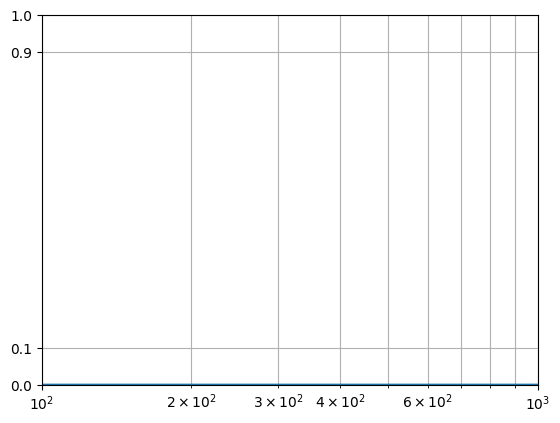

In [4]:
print(fl.find_n_chebyshevII(.8, .1, .9))
highpass_filter = fl.bandpass_filter(6, 204 ,pb_start=180, pb_stop=300, Debug=True)

w, hmag, hphase = make_bode(highpass_filter, bode_start=100, bode_stop=1000)

plt.semilogx(w, db_to_amp(hmag))
plt.grid(which='both')
#plt.xticks([100, 200, 400, 1000])
plt.yticks([0, .1, .9, 1])
plt.axis([100, 1000, 0, 1])